<a href="https://colab.research.google.com/github/SamruddhaHonawade/Emailspam_DetectionModel/blob/main/EmailSpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pandas numpy nltk scikit-learn matplotlib

import string
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# New Section

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv('spam_ham_dataset.csv')

In [ ]:
# prompt: df

df['text'] = df['text'].apply(lambda x: x.replace('\r\n', ' '))


In [ ]:
df.text.iloc[2]


"Subject: neon retreat ho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time ! i know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute . on the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a youth ministers conference that brad and dustin are connected with that week , we ' re going to change the date to the following weekend , january 12 - 13 . now comes the part you need to think about . i think we all agree that it ' s important for us to get together and have some time to recharge our batteries before we get to far into the spring semester , but it can be a lot of trouble and difficult for us to get away without kids , etc . so , brad came up with a pote

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [ ]:
df['label_num'].value_counts()


,count
label_num,
0,3672
1,1499


In [ ]:
stemmer = PorterStemmer()
corpus = []

stopwords_set = set(stopwords.words('english'))

for i in range(len(df)):
    text = df['text'].iloc[i].lower()
    text  = text.translate(str.maketrans('', '', string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text = ' '.join(text)
    corpus.append(text)



In [ ]:
corpus[0]

'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [ ]:
df.text.iloc[0]


"Subject: enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [ ]:
vectorizer = CountVectorizer()

x = vectorizer.fit_transform(corpus).toarray()
y = df.label_num

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
clf = RandomForestClassifier(n_jobs =-1)

clf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
clf.score(x_test, y_test)

0.9719806763285024

# Output Prediction

In [ ]:

email_to_classify = "Subject: jump in to gain substantial ground immediately"
email_text = email_to_classify.lower().translate(str.maketrans('', '', string.punctuation)).split()
email_text = [stemmer.stem(word) for word in email_text if word not in stopwords_set]
email_text = ' '.join(email_text)


email_corpus = [email_text]

x_email = vectorizer.transform(email_corpus).toarray()







In [ ]:
email_to_classify

'Subject: jump in to gain substantial ground immediately'

In [ ]:
clf.predict(x_email)


array([1])

'spam'

In [ ]:
# Check the model accuracy on the test dataset
test_accuracy = clf.score(x_test, y_test)
print(f"Model Test Accuracy: {test_accuracy:.2f}")

# Predict and verify email_to_classify
predicted_label = clf.predict(x_email)[0]
actual_label = df.label_num.iloc[10]

print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {actual_label}")


Model Test Accuracy: 0.97
Predicted Label: 1
Actual Label: 1


In [ ]:
new_email = "Subject: enron methanol ; meter # : 988291"

# Preprocess the email
email_text = new_email.lower().translate(str.maketrans('', '', string.punctuation)).split()
email_text = [stemmer.stem(word) for word in email_text if word not in stopwords_set]
email_text = ' '.join(email_text)

# Transform into the same feature space
x_new_email = vectorizer.transform([email_text]).toarray()

# Predict using the trained model
predicted_label = clf.predict(x_new_email)[0]

print(f"Predicted Label: {'Spam' if predicted_label == 1 else 'Ham'}")


Predicted Label: Ham


In [ ]:
print(vectorizer.get_feature_names_out())
print(clf.feature_importances_)


['00' '000' '0000' ... 'zzocb' 'zzso' 'zzsyt']
[0.00417508 0.00621607 0.         ... 0.         0.         0.        ]


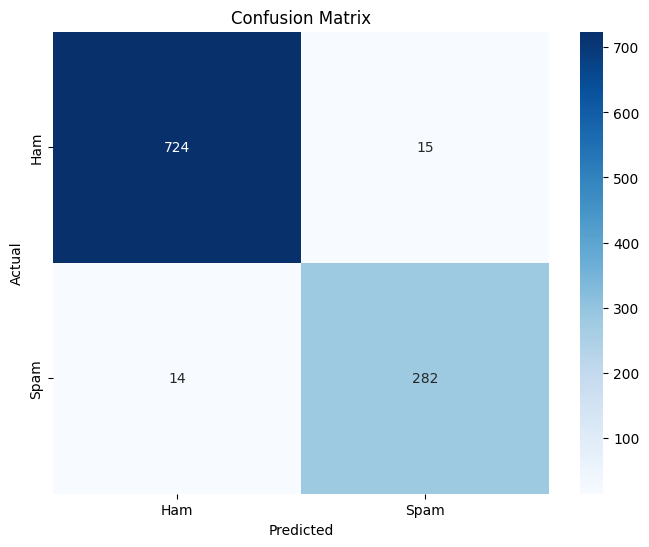

{'Accuracy': 0.9719806763285024,
 'Precision': 0.9494949494949495,
 'Recall': 0.9527027027027027,
 'F1-Score': 0.9510961214165261}

In [ ]:
# Import necessary libraries for metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = clf.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

metrics


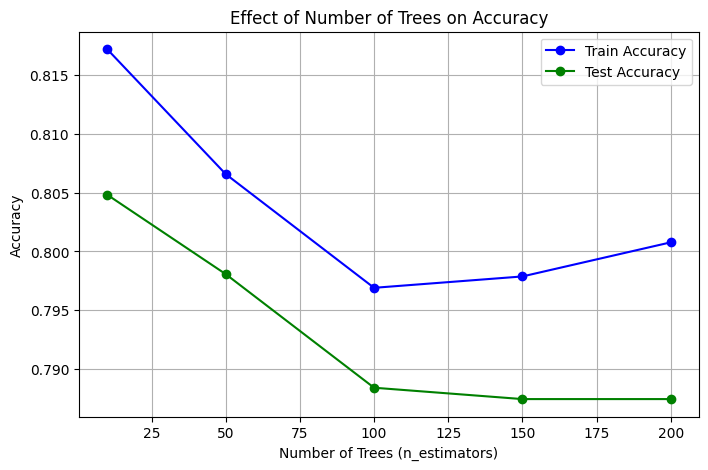

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Reduce the range of n_estimators for faster testing
n_estimators_range = [10, 50, 100, 150, 200]
train_accuracies = []
test_accuracies = []

# Evaluate the model for different numbers of estimators
for n in n_estimators_range:
    temp_clf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1, max_depth=10)
    temp_clf.fit(x_train, y_train)
    train_accuracies.append(temp_clf.score(x_train, y_train))
    test_accuracies.append(temp_clf.score(x_test, y_test))

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_accuracies, label='Train Accuracy', marker='o', color='blue')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', marker='o', color='green')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Effect of Number of Trees on Accuracy')
plt.legend()
plt.grid()
plt.show()
